# **Prescriptive Analysis**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://drive.google.com/file/d/1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG/view?usp=sharing
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1xyEdZJpQw5AK4lWbUbC6mD8Wnfxco1FG")
df

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
0,Q386391,1990,1,1979.2,VESTIBULAR,4,CANCELAMENTO POR ABANDONO,1989.1,20.0,Evadido,...,4.0,Dispensa,3.0,Aprovado,NaN,ORGANIZACAO INDUSTRIAL,4.0,60.0,UNID. ACAD. DE ADMINISTRAÇÃO E CONTABILIDADE,5.0
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
2,K266013,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,6.1,LINGUA PORTUGUESA,4.0,60.0,UNID. ACAD. DE LETRAS,2.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
4,T079917,1990,1,1996.1,VESTIBULAR,1,GRADUADO,1999.2,8.0,Graduado,...,1.0,Normal,3.0,Aprovado,5.6,FÍSICA GERAL III,6.0,90.0,UNID. ACAD. DE FÍSICA,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30125,E191041,1999,16,2013.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,7.0,Graduado,...,1.0,Normal,4.0,Reprovado,2.4,METODOS ESTATISTICOS,4.0,60.0,UNID. ACAD. DE ESTATÍSTICA,3.0
30126,F026548,1999,18,2014.2,SISU,22,CANCELADO 3 REPROV MESMA DISCIPLINA,2016.1,4.0,Evadido,...,1.0,Normal,4.0,Reprovado,3.8,LABORATÓRIO DE PROGRAMAÇÃO I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,1.0
30127,P065307,1999,1,2008.2,VESTIBULAR,1,GRADUADO,2014.1,12.0,Graduado,...,1.0,Normal,3.0,Aprovado,9.8,DIREITO E CIDADANIA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,6.0
30128,R083868,2017,18,2017.2,SISU,0,REGULAR,0.0,NaN,Regular,...,4.0,Dispensa,3.0,Aprovado,NaN,METODOLOGIA CIENTÍFICA,4.0,60.0,UNID. ACAD. DE SOCIOLOGIA E ANTROPOLOGIA,1.0


## Preprocessing

In [3]:
# Filtrando o período de ingresso
df_filtrado = df[(df['periodo_ingresso'] >= 2006.1) & (df['periodo_ingresso'] <= 2019.2)]

# Removendo linhas com 'tipo_matricula' igual a 'Dispensa'
df_filtrado = df_filtrado[df_filtrado['tipo_matricula'] != 'Dispensa']

# Removendo linhas com 'situacao' igual a 'Em Curso'
df_filtrado = df_filtrado[df_filtrado['situacao'] != 'Em Curso']

# Exibindo as primeiras linhas do dataframe filtrado para confirmar as mudanças
df_filtrado.head()

,id,codigo_curriculo,codigo_ingresso,periodo_ingresso,forma_ingresso,codigo_evasao,forma_evasao,periodo_evasao,evadiu_periodo,forma_saida,...,codigo_tipo_matricula,tipo_matricula,codigo_situacao,situacao,media_final,nome_disciplina,numero_creditos,carga_horaria,nome_setor,periodo_relativo
1,A261799,1999,16,2011.1,VESTIBULAR / ENEM,1,GRADUADO,2016.1,11.0,Graduado,...,1.0,Normal,3.0,Aprovado,7.5,ESTÁGIO INTEGRADO,10.0,300.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,9.0
3,H046905,1999,16,2014.1,VESTIBULAR / ENEM,21,CANCELADO REPROVOU TODAS POR FALTAS,2016.2,6.0,Evadido,...,1.0,Normal,3.0,Aprovado,5.0,CALCULO DIFERENCIAL E INTEGRAL I,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
9,X175376,1999,16,2011.2,VESTIBULAR / ENEM,8,CANCELAMENTO P/ SOLICITACAO ALUNO,2013.2,5.0,Evadido,...,1.0,Normal,5.0,Reprovado por Falta,NaN,MATEMÁTICA DISCRETA,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,2.0
12,C332956,1999,1,2009.2,VESTIBULAR,1,GRADUADO,2013.2,9.0,Graduado,...,1.0,Normal,3.0,Aprovado,8.3,ORG.E ARQUITETURA DE COMPUTADORES I,4.0,60.0,UNID. ACAD. DE SISTEMAS E COMPUTAÇÃO,4.0
18,Q283427,1999,1,2010.2,VESTIBULAR,12,CANCELADO NOVO INGRESSO MESMO CURSO,2012.1,4.0,Reingresso,...,1.0,Normal,4.0,Reprovado,1.7,CALCULO DIFERENCIAL E INTEGRAL II,4.0,60.0,UNID. ACAD. DE MATEMÁTICA,3.0


## Basic

### 1. Based on the history of failures due to absences, how many cases will occur in the next period of the course LABORATORY OF PROGRAMMING I? Define 3 options for solving this issue and follow the best one.

In [4]:
# Filtrar dados para a disciplina específica "LABORATÓRIO DE PROGRAMAÇÃO I"
lab_prog_i = df_filtrado[df_filtrado['nome_disciplina'] == 'LABORATÓRIO DE PROGRAMAÇÃO I']

# Contar o número de reprovações por falta para cada período
reprovacoes_por_falta = lab_prog_i[lab_prog_i['situacao'] == 'Reprovado por Falta']

# Calcular a média de reprovações por falta
media_reprovacoes_falta = reprovacoes_por_falta['situacao'].count() / lab_prog_i['periodo_matricula'].nunique()
media_reprovacoes_falta

2.3214285714285716

### 2. What are the variables that most impact the differentiation between passed and failed students? Define 3 options for solving this issue and follow the best one.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Preparando o conjunto de dados para modelagem
# Selecionando colunas potencialmente úteis e tratando valores faltantes

# Remover colunas com muitos valores nulos ou que não são relevantes para a análise de aprovação
columns_to_use = ['idade_ingresso', 'media_final', 'periodo_matricula', 'numero_creditos',
                  'carga_horaria', 'sexo', 'situacao', 'forma_ingresso']

# Criando um novo DataFrame com as colunas selecionadas
df_model = df_filtrado[columns_to_use].dropna()

# Codificar variáveis categóricas
label_encoders = {}
for column in ['sexo', 'situacao', 'forma_ingresso']:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])
    label_encoders[column] = le

# Separar o conjunto de dados em características e alvo
X = df_model.drop('situacao', axis=1)
y = df_model['situacao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Avaliar o modelo
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9959871589085072

In [6]:
# Obter a importância das características
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importances

,feature,importance
1,media_final,0.935687
2,periodo_matricula,0.031160
0,idade_ingresso,0.012087
6,forma_ingresso,0.007132
3,numero_creditos,0.005707
4,carga_horaria,0.005692
5,sexo,0.002535


### 3. What is the performance of the bottom 10% of students in mathematics sector courses? Define 3 options for solving this issue and follow the best one.

In [7]:
# Filtrar disciplinas do setor de Matemática
matematica_df = df_filtrado[df_filtrado['nome_setor'].str.contains("MATEMÁTICA")]

# Remover entradas onde a média final é NaN, pois não podemos calcular percentis com dados faltantes
matematica_df = matematica_df.dropna(subset=['media_final'])

# Calcular o percentil 10 da média final para disciplinas de matemática
percentil_10 = matematica_df['media_final'].quantile(0.1)
desempenho_inferior_10 = matematica_df[matematica_df['media_final'] <= percentil_10]

# Exibir o valor do percentil e algumas estatísticas dos alunos abaixo do percentil 10
percentil_10, desempenho_inferior_10[['id', 'nome_disciplina', 'media_final']].head()

(0.8,
           id                         nome_disciplina  media_final
 189  Y389124        CALCULO DIFERENCIAL E INTEGRAL I          0.5
 301  X347647       CALCULO DIFERENCIAL E INTEGRAL II          0.0
 341  P284266  ALGEBRA VETORIAL E GEOMETRIA ANALÍTICA          0.0
 590  I273965                        ALGEBRA LINEAR I          0.0
 668  X358294       CALCULO DIFERENCIAL E INTEGRAL II          0.0)

## Moderate

### 1. How does the profile of a student who took extra-curricular courses, never failed, and never dropped out significantly influence their academic success? Define 3 options for solving this issue and follow the best one.

In [8]:
# Mostrar as colunas novamente para identificar quais podem ser usadas para filtrar alunos que:
# - Cursaram disciplinas do tipo extra-curricular
# - Nunca reprovaram
# - Nunca trancaram o curso
df.columns

Index(['id', 'codigo_curriculo', 'codigo_ingresso', 'periodo_ingresso',
       'forma_ingresso', 'codigo_evasao', 'forma_evasao', 'periodo_evasao',
       'evadiu_periodo', 'forma_saida', 'acao_afirmativa',
       'tipo_reserva_vagas', 'forma_reserva_vagas', 'sexo', 'codigo_cor',
       'nome_cor', 'idade_ingresso', 'idade_evasao', 'tipo_ensino_medio',
       'ensino_medio', 'apv_media_geral', 'codigo_disciplina',
       'periodo_matricula', 'turma', 'codigo_tipo_matricula', 'tipo_matricula',
       'codigo_situacao', 'situacao', 'media_final', 'nome_disciplina',
       'numero_creditos', 'carga_horaria', 'nome_setor', 'periodo_relativo'],
      dtype='object')

In [9]:
# Verificar as categorias únicas dessas colunas para entender melhor como filtrar os dados
unique_values = {
    "tipo_matricula": df['tipo_matricula'].unique(),
    "situacao": df['situacao'].unique(),
    "forma_saida": df['forma_saida'].unique(),
    "forma_evasao": df['forma_evasao'].unique()
}

unique_values

{'tipo_matricula': array(['Dispensa', 'Normal', 'Extra Curricular', 'RER',
        'Aguardando pré-requisito'], dtype=object),
 'situacao': array(['Aprovado', 'Em Curso', 'Reprovado por Falta', 'Reprovado',
        'Trancado', 'Cancelado', 'Participante', 'Dispensado'],
       dtype=object),
 'forma_saida': array(['Evadido', 'Graduado', 'Regular', 'Reingresso', 'Outros'],
       dtype=object),
 'forma_evasao': array(['CANCELAMENTO POR ABANDONO', 'GRADUADO', 'REGULAR',
        'CANCELADO REPROVOU TODAS POR FALTAS',
        'CANCELAMENTO P/ SOLICITACAO ALUNO',
        'CANCELADO NOVO INGRESSO MESMO CURSO',
        'CANCELADO 3 REPROV MESMA DISCIPLINA', 'CANCELAMENTO DE MATRICULA',
        'CANCELAMENTO P/ MUDANCA CURSO', 'TRANSFERIDO PARA OUTRA IES',
        'CANCELADO NOVO INGRESSO OUTRO CURSO',
        'CONCLUIDO - NAO COLOU GRAU', 'CUMPRIMENTO CONVENIO',
        'CANCELAMENTO P/ DECISAO JUDICIAL'], dtype=object)}

In [10]:
# Filtrar o dataframe conforme os critérios estabelecidos
df_model = df_filtrado[
    (df_filtrado['tipo_matricula'] == "Extra Curricular") &
    (~df_filtrado['situacao'].isin(["Reprovado", "Reprovado por Falta", "Trancado"]))
]

# Selecionar as variáveis relevantes para a modelagem
# Vamos incluir algumas variáveis demográficas e acadêmicas que podem ser úteis
features = [
    'idade_ingresso', 'sexo', 'nome_cor', 'tipo_ensino_medio', 'forma_ingresso',
    'periodo_ingresso', 'media_final', 'apv_media_geral'
]
df_model = df_model[features].dropna()  # Remover linhas com valores nulos para simplificar

# Verificar a quantidade de dados disponíveis após filtragem
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 30 to 30080
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade_ingresso     673 non-null    int64  
 1   sexo               673 non-null    object 
 2   nome_cor           673 non-null    object 
 3   tipo_ensino_medio  673 non-null    float64
 4   forma_ingresso     673 non-null    object 
 5   periodo_ingresso   673 non-null    float64
 6   media_final        673 non-null    float64
 7   apv_media_geral    673 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 47.3+ KB


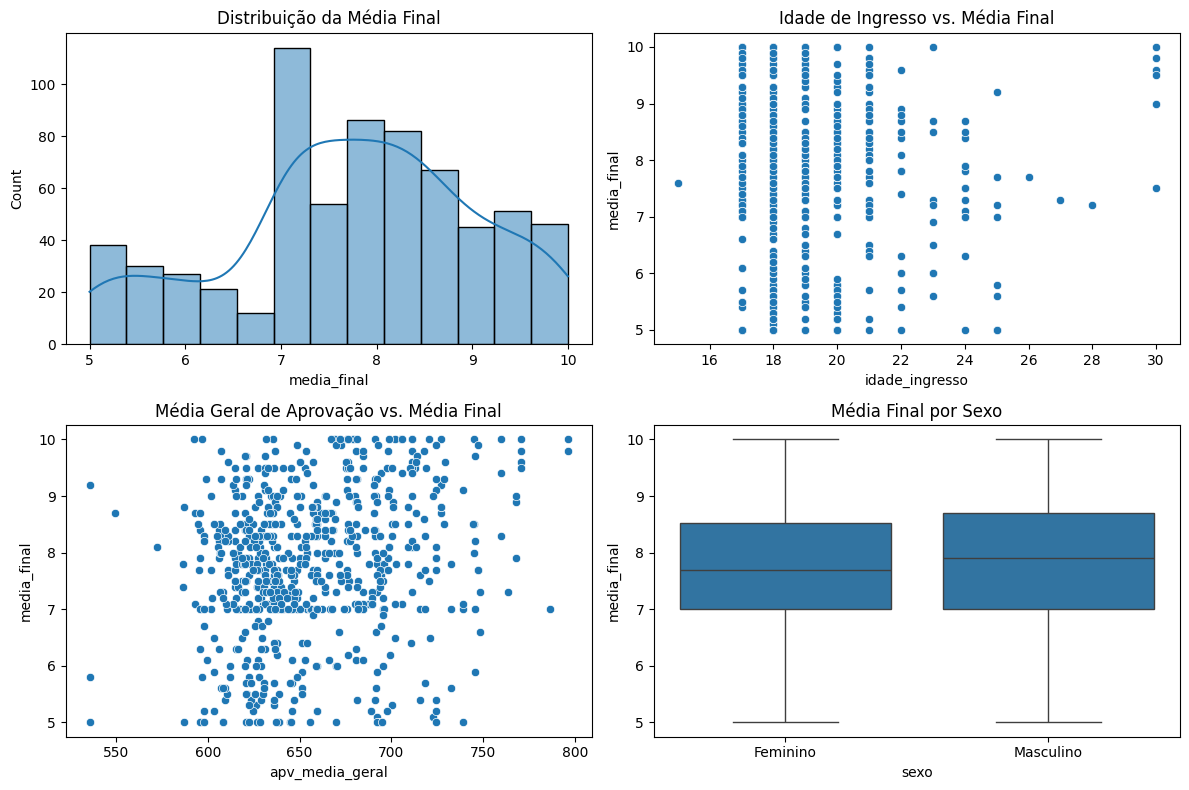

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o tamanho do plot
plt.figure(figsize=(12, 8))

# Distribuição da média final
plt.subplot(2, 2, 1)
sns.histplot(df_model['media_final'], kde=True)
plt.title('Distribuição da Média Final')

# Relação entre média final e idade de ingresso
plt.subplot(2, 2, 2)
sns.scatterplot(x='idade_ingresso', y='media_final', data=df_model)
plt.title('Idade de Ingresso vs. Média Final')

# Relação entre média final e média geral de aprovação
plt.subplot(2, 2, 3)
sns.scatterplot(x='apv_media_geral', y='media_final', data=df_model)
plt.title('Média Geral de Aprovação vs. Média Final')

# Boxplot da média final por sexo
plt.subplot(2, 2, 4)
sns.boxplot(x='sexo', y='media_final', data=df_model)
plt.title('Média Final por Sexo')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Codificação de variáveis categóricas
categorical_features = ['sexo', 'nome_cor', 'forma_ingresso']
one_hot_encoder = OneHotEncoder(drop='first')  # drop='first' para evitar a colinearidade

# Pipeline de preprocessamento para transformar as variáveis
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # manter as outras variáveis numéricas sem alterações
)

# Dividir os dados em treino e teste
X = df_model.drop('media_final', axis=1)
y = df_model['media_final']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

# Avaliar o modelo
y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train, rmse_test, r2_train, r2_test

(1.2753954379551464,
 1.1838336320848386,
 0.05206977052775341,
 0.04714691504427204)

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo de floresta aleatória
model_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf_pipeline.fit(X_train, y_train)

# Avaliar o modelo de floresta aleatória
y_pred_train_rf = model_rf_pipeline.predict(X_train)
y_pred_test_rf = model_rf_pipeline.predict(X_test)
rmse_train_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_test_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

rmse_train_rf, rmse_test_rf, r2_train_rf, r2_test_rf

(0.9101418838604518,
 1.3367111884815857,
 0.517269370358471,
 -0.21484190170842288)

In [15]:
from sklearn.model_selection import GridSearchCV

# Definindo o espaço de parâmetros para o Grid Search
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

# Configurando o Grid Search com validação cruzada
grid_search = GridSearchCV(model_rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Treinando o modelo com Grid Search
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Converter de negativo para positivo porque a métrica é neg_mean_squared_error

best_params, best_score

Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'regressor__max_depth': 10,
  'regressor__min_samples_split': 10,
  'regressor__n_estimators': 200},
 1.7256657175958137)

In [16]:
# Configurando o Grid Search com validação cruzada novamente
grid_search = GridSearchCV(model_rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Treinando o modelo com Grid Search
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Converter de negativo para positivo porque a métrica é neg_mean_squared_error

best_params, best_score

Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'regressor__max_depth': 10,
  'regressor__min_samples_split': 10,
  'regressor__n_estimators': 200},
 1.7256657175958137)

In [17]:
# Ajuste manual dos parâmetros para o modelo de floresta aleatória
manual_rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=150, max_depth=10, min_samples_split=5, random_state=42))
])

manual_rf_pipeline.fit(X_train, y_train)

# Avaliação do modelo ajustado manualmente
y_pred_train_manual_rf = manual_rf_pipeline.predict(X_train)
y_pred_test_manual_rf = manual_rf_pipeline.predict(X_test)
rmse_train_manual_rf = mean_squared_error(y_train, y_pred_train_manual_rf, squared=False)
rmse_test_manual_rf = mean_squared_error(y_test, y_pred_test_manual_rf, squared=False)
r2_train_manual_rf = r2_score(y_train, y_pred_train_manual_rf)
r2_test_manual_rf = r2_score(y_test, y_pred_test_manual_rf)

rmse_train_manual_rf, rmse_test_manual_rf, r2_train_manual_rf, r2_test_manual_rf

(0.9702851965282231,
 1.2940415278070807,
 0.4513625292090282,
 -0.13852094367550727)

### 2. What is the graduation rate forecast for the next year based on past trends? Define 3 options for solving this issue and follow the best one.

In [18]:
# Verificar as colunas relevantes para construção de uma série temporal de taxa de graduação
df_filtrado[['periodo_ingresso', 'periodo_evasao', 'forma_saida']].head(), df_filtrado['forma_saida'].unique()

(    periodo_ingresso  periodo_evasao forma_saida
 1             2011.1          2016.1    Graduado
 3             2014.1          2016.2     Evadido
 9             2011.2          2013.2     Evadido
 12            2009.2          2013.2    Graduado
 18            2010.2          2012.1  Reingresso,
 array(['Graduado', 'Evadido', 'Reingresso', 'Regular', 'Outros'],
       dtype=object))

In [19]:
# Converter 'periodo_evasao' para um formato de ano para agrupamento
df_filtrado['ano_evasao'] = df_filtrado['periodo_evasao'].apply(lambda x: int(str(x)[:4]) if pd.notna(x) else None)

# Agregar por ano de evasão para contar total e graduados
aggregated_data = df_filtrado.groupby('ano_evasao')['forma_saida'].agg(['count', lambda x: (x == 'Graduado').sum()]).rename(columns={'count': 'total', '<lambda>': 'graduados'})

# Calcular a taxa de graduação
aggregated_data['taxa_graduacao'] = aggregated_data['graduados'] / aggregated_data['total']

# Remover anos com dados nulos (sem evasão definida)
aggregated_data = aggregated_data.dropna().sort_index()

# Exibir as taxas de graduação calculadas
aggregated_data

ValueError: invalid literal for int() with base 10: '0.0'

In [20]:
# Verificar os valores únicos em 'periodo_evasao' para entender o erro
df_filtrado['periodo_evasao'].unique()

array([2016.1, 2016.2, 2013.2, 2012.1, 2017.1, 2019.1, 2010.2, 2017.2,
       2010.1,    0. , 2019.2, 2013.1, 2018.1, 2015.2, 2014.1, 2020.1,
       2015.1, 2014.2, 2018.2, 2011.2, 2011.1, 2012.2, 2009.2, 2008.1,
       2009.1, 2008.2, 2007.2, 2007.1, 2006.2])

In [21]:
# Remover registros com 'periodo_evasao' igual a 0.0 antes de converter para o formato de ano
df_filtrado_clean = df_filtrado[df_filtrado['periodo_evasao'] != 0.0]

# Converter 'periodo_evasao' para um formato de ano para agrupamento
df_filtrado_clean['ano_evasao'] = df_filtrado_clean['periodo_evasao'].apply(lambda x: int(str(x)[:4]))

# Agregar por ano de evasão para contar total e graduados
aggregated_data = df_filtrado_clean.groupby('ano_evasao')['forma_saida'].agg(['count', lambda x: (x == 'Graduado').sum()]).rename(columns={'count': 'total', '<lambda>': 'graduados'})

# Calcular a taxa de graduação
aggregated_data['taxa_graduacao'] = aggregated_data['graduados'] / aggregated_data['total']

# Exibir as taxas de graduação calculadas
aggregated_data

<ipython-input-21-26bf51dd17ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_clean['ano_evasao'] = df_filtrado_clean['periodo_evasao'].apply(lambda x: int(str(x)[:4]))


KeyError: 'graduados'

In [22]:
# Corrigindo o problema de agrupamento e renomeação
aggregated_data = df_filtrado_clean.groupby('ano_evasao').agg(
    total=('forma_saida', 'count'),
    graduados=('forma_saida', lambda x: (x == 'Graduado').sum())
)

# Calcular a taxa de graduação
aggregated_data['taxa_graduacao'] = aggregated_data['graduados'] / aggregated_data['total']

# Exibir as taxas de graduação calculadas
aggregated_data.reset_index()

,ano_evasao,total,graduados,taxa_graduacao
0,2006,2,0,0.000000
1,2007,9,1,0.111111
2,2008,49,17,0.346939
3,2009,109,18,0.165138
4,2010,559,339,0.606440
5,2011,778,378,0.485861
6,2012,1148,581,0.506098
7,2013,928,444,0.478448
8,2014,939,355,0.378062
9,2015,1199,551,0.459550


In [23]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Preparar os dados para o modelo ARIMA
# Considerando anos a partir de 2007 para evitar anos com dados muito esparsos
data_for_arima = aggregated_data.loc[2007:]['taxa_graduacao']

# Fit do modelo ARIMA
# Usando parâmetros padrões p, d, q = 1, 1, 1 para uma configuração simples
arima_model = ARIMA(data_for_arima, order=(1, 1, 1))
arima_results = arima_model.fit()

# Previsão para o próximo ano (2021)
forecast = arima_results.get_forecast(steps=1)
predicted_graduation_rate = forecast.summary_frame()
predicted_graduation_rate

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

taxa_graduacao,mean,mean_se,mean_ci_lower,mean_ci_upper
14,0.511413,0.239793,0.041426,0.981399


### 3. Is it possible to determine student dropout trends over time, based on historical patterns of academic performance and types of enrollment? Define 3 options for solving this issue and follow the best one.

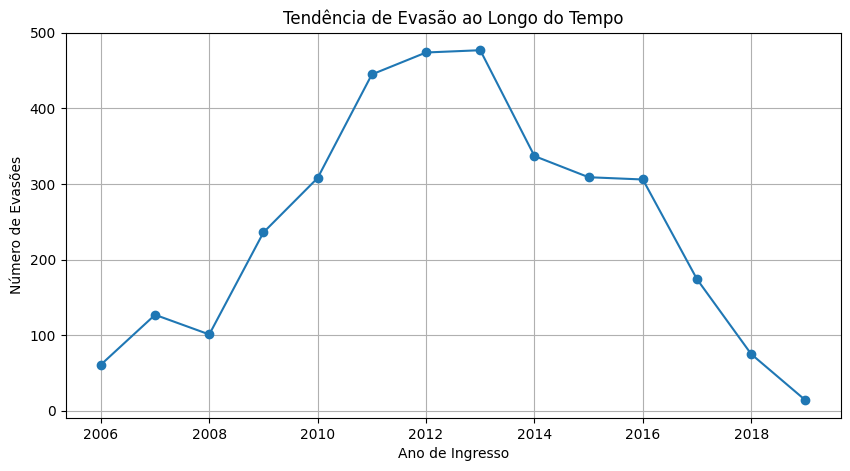

In [24]:
import matplotlib.pyplot as plt

# Converter o período de ingresso para ano (ignorando o semestre)
df_filtrado['ano_ingresso'] = df_filtrado['periodo_ingresso'].apply(lambda x: int(str(x).split('.')[0]))

# Contagem de evasão por ano
evasao_ano = df_filtrado[df_filtrado['forma_saida'].str.contains('Evadido')].groupby('ano_ingresso').size()

# Plotar a tendência de evasão ao longo do tempo
plt.figure(figsize=(10, 5))
evasao_ano.plot(kind='line', marker='o')
plt.title('Tendência de Evasão ao Longo do Tempo')
plt.xlabel('Ano de Ingresso')
plt.ylabel('Número de Evasões')
plt.grid(True)
plt.show()

<ipython-input-26-11c04ba3a846>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medias['evadiu'] = df_medias['forma_saida'].apply(lambda x: 'Evadido' if 'Evadido' in x else 'Não Evadido')


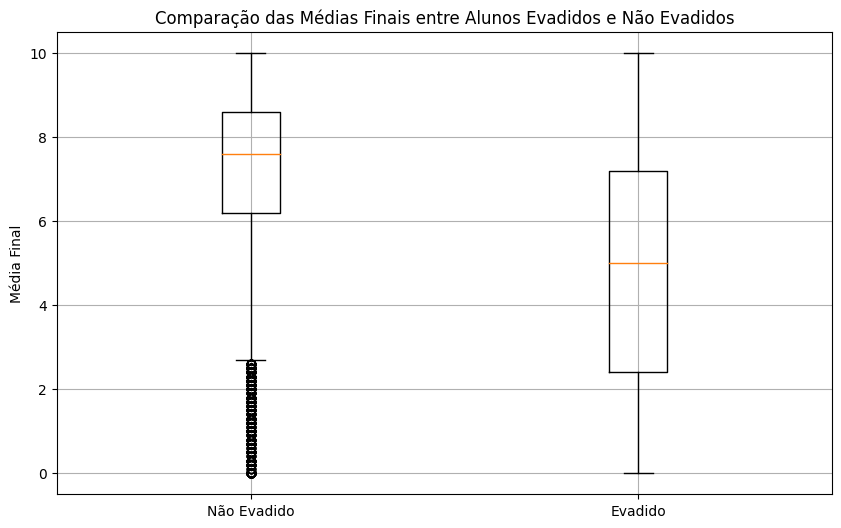

In [26]:
# Filtrar alunos que têm média final registrada
df_medias = df_filtrado.dropna(subset=['media_final'])

# Definir se o aluno evadiu ou não
df_medias['evadiu'] = df_medias['forma_saida'].apply(lambda x: 'Evadido' if 'Evadido' in x else 'Não Evadido')

# Plotar gráfico de caixa para médias finais comparando evadidos e não evadidos
plt.figure(figsize=(10, 6))
plt.boxplot([df_medias[df_medias['evadiu'] == 'Não Evadido']['media_final'], df_medias[df_medias['evadiu'] == 'Evadido']['media_final']],
            labels=['Não Evadido', 'Evadido'])
plt.title('Comparação das Médias Finais entre Alunos Evadidos e Não Evadidos')
plt.ylabel('Média Final')
plt.grid(True)
plt.show()

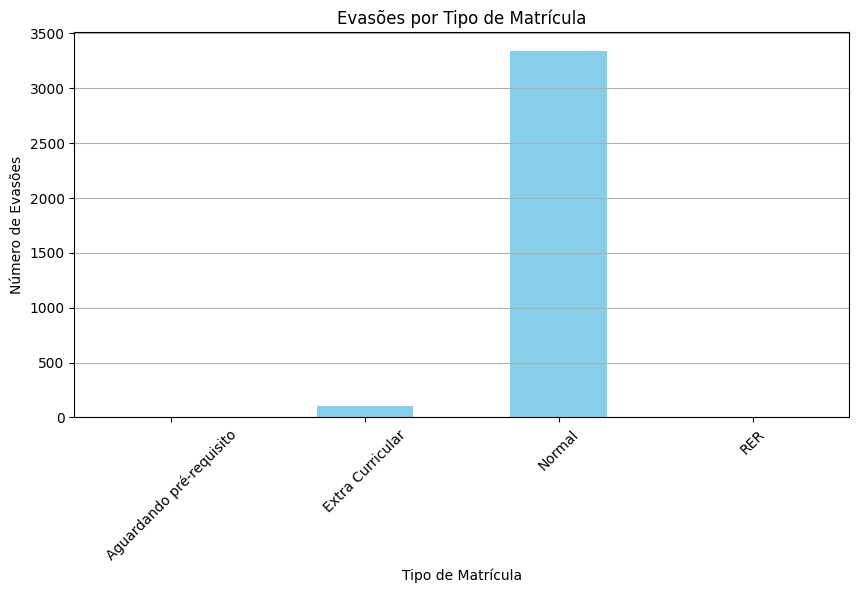

In [27]:
# Contagem de evasões por tipo de matrícula
evasao_tipo_matricula = df_filtrado[df_filtrado['forma_saida'].str.contains('Evadido')].groupby('tipo_matricula').size()

# Plotar gráfico de barras para evasões por tipo de matrícula
plt.figure(figsize=(10, 5))
evasao_tipo_matricula.plot(kind='bar', color='skyblue')
plt.title('Evasões por Tipo de Matrícula')
plt.xlabel('Tipo de Matrícula')
plt.ylabel('Número de Evasões')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

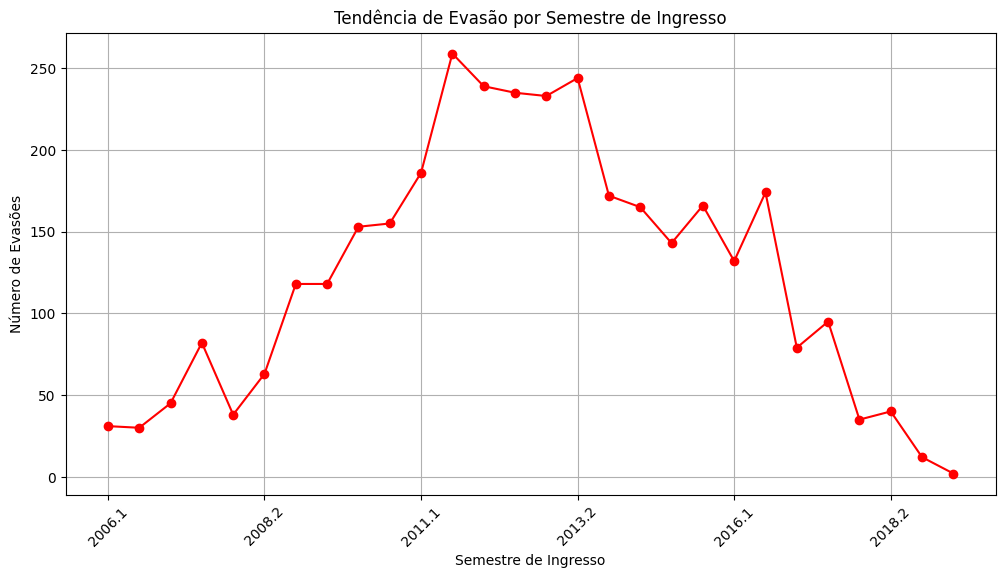

In [28]:
# Conversão do período de ingresso para formato string para facilitar a agregação por semestre
df_filtrado['periodo_ingresso_str'] = df_filtrado['periodo_ingresso'].apply(lambda x: str(x))

# Contagem de evasão por semestre de ingresso
evasao_semestre = df_filtrado[df_filtrado['forma_saida'].str.contains('Evadido')].groupby('periodo_ingresso_str').size()

# Plotar a tendência de evasão por semestre
plt.figure(figsize=(12, 6))
evasao_semestre.plot(kind='line', marker='o', color='red')
plt.title('Tendência de Evasão por Semestre de Ingresso')
plt.xlabel('Semestre de Ingresso')
plt.ylabel('Número de Evasões')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
# Filtrar apenas alunos evadidos com período de evasão registrado
df_evadidos = df_filtrado[df_filtrado['forma_saida'].str.contains('Evadido')]
df_evadidos = df_evadidos.dropna(subset=['periodo_evasao'])

# Converter período de ingresso e evasão para formato de ano e semestre
def periodo_para_anosemestre(periodo):
    ano, semestre = map(int, str(periodo).split('.'))
    return ano * 2 + (semestre - 1)

df_evadidos['ingresso_semestres'] = df_evadidos['periodo_ingresso'].apply(periodo_para_anosemestre)
df_evadidos['evasao_semestres'] = df_evadidos['periodo_evasao'].apply(periodo_para_anosemestre)

# Calcular a duração em semestres até a evasão
df_evadidos['duracao_semestres'] = df_evadidos['evasao_semestres'] - df_evadidos['ingresso_semestres']

# Calculando a média de semestres até a evasão
tempo_medio_evasao = df_evadidos['duracao_semestres'].mean()
tempo_medio_evasao

4.746806039488966

## Challenging

### 1. Through advanced analysis, based on dimensionality reduction of students’ academic characteristics, how can we predict which students are at risk of dropping out? Define 3 options for solving this issue and follow the best one.

In [30]:
# Seleção inicial de características relevantes
features = [
    'periodo_ingresso', 'forma_ingresso', 'idade_ingresso', 'sexo', 'nome_cor',
    'apv_media_geral', 'media_final', 'situacao', 'forma_saida'
]

# Foco em características acadêmicas e demográficas
df_modelo = df_filtrado[features]

# Verificar valores ausentes para cada característica
missing_data = df_modelo.isnull().sum()
missing_data_percentage = (missing_data / len(df_modelo)) * 100

missing_data, missing_data_percentage

(periodo_ingresso       0
 forma_ingresso         0
 idade_ingresso         0
 sexo                   0
 nome_cor               0
 apv_media_geral      447
 media_final         1373
 situacao               0
 forma_saida            0
 dtype: int64,
 periodo_ingresso    0.000000
 forma_ingresso      0.000000
 idade_ingresso      0.000000
 sexo                0.000000
 nome_cor            0.000000
 apv_media_geral     3.231870
 media_final         9.926976
 situacao            0.000000
 forma_saida         0.000000
 dtype: float64)

In [31]:
# Preencher valores ausentes com a média das colunas respectivas
df_modelo['apv_media_geral'].fillna(df_modelo['apv_media_geral'].mean(), inplace=True)
df_modelo['media_final'].fillna(df_modelo['media_final'].mean(), inplace=True)

# Codificação de variáveis categóricas usando one-hot encoding
df_modelo = pd.get_dummies(df_modelo, columns=['forma_ingresso', 'sexo', 'nome_cor', 'situacao', 'forma_saida'])

# Normalizar os dados numéricos
from sklearn.preprocessing import StandardScaler

# Selecione apenas colunas numéricas
numerical_features = ['periodo_ingresso', 'idade_ingresso', 'apv_media_geral', 'media_final']
scaler = StandardScaler()
df_modelo[numerical_features] = scaler.fit_transform(df_modelo[numerical_features])

# Verificar o dataframe resultante
df_modelo.head()

<ipython-input-31-b0a5e08ac870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['apv_media_geral'].fillna(df_modelo['apv_media_geral'].mean(), inplace=True)
<ipython-input-31-b0a5e08ac870>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['media_final'].fillna(df_modelo['media_final'].mean(), inplace=True)


,periodo_ingresso,idade_ingresso,apv_media_geral,media_final,forma_ingresso_CONVENIO PEC-G,forma_ingresso_GRADUADO,forma_ingresso_JUDICIAL,forma_ingresso_REINGRESSO,forma_ingresso_REOPCAO,forma_ingresso_SISU,...,situacao_Dispensado,situacao_Participante,situacao_Reprovado,situacao_Reprovado por Falta,situacao_Trancado,forma_saida_Evadido,forma_saida_Graduado,forma_saida_Outros,forma_saida_Regular,forma_saida_Reingresso
1,-0.479594,0.436445,0.346375,3.518560e-01,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.400850,-0.963722,0.766971,-7.208285e-01,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9,-0.450246,0.086403,-0.199343,-7.621882e-16,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
12,-1.037209,-0.613680,-1.132491,6.951151e-01,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
18,-0.743727,-0.613680,-1.581729,-2.136772e+00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [32]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Dimensionalidade do input
input_dim = df_modelo.shape[1]
encoding_dim = 10  # Tamanho do espaço latente

# Definir a arquitetura do autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Compilar o modelo
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o autoencoder
history = autoencoder.fit(df_modelo, df_modelo,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

# Definir o modelo para o encoder
encoder = Model(input_layer, encoded)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

### 2. Through advanced analysis, is it possible to generate new student profiles that maximize the probability of graduation, based on the characteristics of previously graduated students? Define 3 options for solving this issue and follow the best one.

In [33]:
# Verificando estatísticas descritivas e a quantidade de valores ausentes
descritivas = df_filtrado.describe(include='all')
valores_ausentes = df_filtrado.isnull().sum()

descritivas, valores_ausentes

(             id  codigo_curriculo  codigo_ingresso  periodo_ingresso  \
 count     13831      13831.000000     13831.000000      13831.000000   
 unique     2360               NaN              NaN               NaN   
 top     Z302110               NaN              NaN               NaN   
 freq         22               NaN              NaN               NaN   
 mean        NaN       2004.672909        12.136939       2012.734155   
 std         NaN          8.362746         7.349250          3.407495   
 min         NaN       1999.000000         1.000000       2006.100000   
 25%         NaN       1999.000000         1.000000       2010.200000   
 50%         NaN       1999.000000        16.000000       2013.100000   
 75%         NaN       2017.000000        18.000000       2015.200000   
 max         NaN       2017.000000        18.000000       2019.200000   
 
        forma_ingresso  codigo_evasao forma_evasao  periodo_evasao  \
 count           13831   13831.000000        13831  

In [41]:
# Limpeza de Dados
# Remover colunas com alta quantidade de valores ausentes ou não críticos
df_modelo = df_filtrado.drop(columns=['tipo_ensino_medio', 'evadiu_periodo', 'idade_evasao'])

# Tratamento de valores ausentes nas colunas restantes
# Preencher valores ausentes na coluna 'media_final' com a média da coluna
df_modelo['media_final'].fillna(df_modelo['media_final'].mean(), inplace=True)

# Seleção de Características
# Selecionar um conjunto de características potencialmente úteis
features = ['forma_ingresso', 'sexo', 'idade_ingresso', 'media_final', 'codigo_curriculo', 'periodo_ingresso']
target = 'forma_evasao'  # Vamos prever se o aluno se graduou

# Filtrar o DataFrame para incluir somente as colunas selecionadas e o alvo
df_modelo = df_modelo[features + [target]]

# Codificação de Variáveis Categóricas
# Usar get_dummies para converter variáveis categóricas em variáveis dummy/indicadoras
df_modelo = pd.get_dummies(df_modelo, columns=['forma_ingresso', 'sexo'])

# Visualização das primeiras linhas após preparação
df_modelo.head()

,idade_ingresso,media_final,codigo_curriculo,periodo_ingresso,forma_evasao,forma_ingresso_CONVENIO PEC-G,forma_ingresso_GRADUADO,forma_ingresso_JUDICIAL,forma_ingresso_REINGRESSO,forma_ingresso_REOPCAO,forma_ingresso_SISU,forma_ingresso_TRANSFERENCIA,forma_ingresso_VESTIBULAR,forma_ingresso_VESTIBULAR / ENEM,sexo_Feminino,sexo_Masculino
1,21,7.500000,1999,2011.1,GRADUADO,False,False,False,False,False,False,False,False,True,False,True
3,17,5.000000,1999,2014.1,CANCELADO REPROVOU TODAS POR FALTAS,False,False,False,False,False,False,False,False,True,False,True
9,20,6.679964,1999,2011.2,CANCELAMENTO P/ SOLICITACAO ALUNO,False,False,False,False,False,False,False,False,True,True,False
12,18,8.300000,1999,2009.2,GRADUADO,False,False,False,False,False,False,False,True,False,False,True
18,18,1.700000,1999,2010.2,CANCELADO NOVO INGRESSO MESMO CURSO,False,False,False,False,False,False,False,True,False,False,True


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Codificação da variável alvo: 1 para 'GRADUADO', 0 para outros
label_encoder = LabelEncoder()
df_modelo['graduado'] = label_encoder.fit_transform(df_modelo['forma_evasao'] == 'GRADUADO')

# Removendo a coluna original 'forma_evasao' após a codificação
df_modelo = df_modelo.drop(columns=['forma_evasao'])

# Dividindo os dados em conjunto de treino e teste
X = df_modelo.drop('graduado', axis=1)
y = df_modelo['graduado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando um modelo de Floresta Aleatória
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predições e avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.8174918684495844,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.84      0.85      1661\n           1       0.76      0.79      0.77      1106\n\n    accuracy                           0.82      2767\n   macro avg       0.81      0.81      0.81      2767\nweighted avg       0.82      0.82      0.82      2767\n')

In [43]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para a busca em grade
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo de Floresta Aleatória para a busca em grade
rf_model = RandomForestClassifier(random_state=42)

# Configurando a busca em grade com validação cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Treinando o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.8327910339840926)

In [44]:
# Tentando executar a busca em grade novamente para otimizar os parâmetros
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score obtido
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.8327910339840926)

In [45]:
# Definindo uma grade de parâmetros mais simples para evitar problemas de recursos
param_grid_simplified = {
    'n_estimators': [100, 200],  # Menos opções
    'max_depth': [None, 20],     # Menos opções
    'min_samples_split': [2, 5], # Menos opções
    'min_samples_leaf': [1, 2]   # Menos opções
}

# Configurando novamente a busca em grade com a nova configuração
grid_search_simplified = GridSearchCV(estimator=rf_model, param_grid=param_grid_simplified, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Executando a busca em grade simplificada
grid_search_simplified.fit(X_train, y_train)

# Melhores parâmetros e melhor score da busca simplificada
best_params_simplified = grid_search_simplified.best_params_
best_score_simplified = grid_search_simplified.best_score_

best_params_simplified, best_score_simplified

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'max_depth': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.8288141720896601)

In [46]:
# Ajuste manual dos parâmetros
rf_adjusted = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
rf_adjusted.fit(X_train, y_train)

# Predições com o modelo ajustado
y_pred_adjusted = rf_adjusted.predict(X_test)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
report_adjusted = classification_report(y_test, y_pred_adjusted)

accuracy_adjusted, report_adjusted

(0.8214672930972172,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.84      0.85      1661\n           1       0.77      0.80      0.78      1106\n\n    accuracy                           0.82      2767\n   macro avg       0.81      0.82      0.82      2767\nweighted avg       0.82      0.82      0.82      2767\n')

In [47]:
from sklearn.linear_model import LogisticRegression

# Configurando e treinando um modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predições com o modelo de Regressão Logística
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

accuracy_logistic, report_logistic

(0.7495482471991326,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.76      0.78      1661\n           1       0.67      0.73      0.70      1106\n\n    accuracy                           0.75      2767\n   macro avg       0.74      0.75      0.74      2767\nweighted avg       0.75      0.75      0.75      2767\n')

### 3. Through advanced analysis, is it possible to identify critical moments in a student’s academic trajectory, such as periods where the risk of dropout is higher, based on sequences of grades and academic situations? Define 3 options for solving this issue and follow the best one.

In [48]:
# Selecionando colunas relevantes e organizando por aluno e período
df_temporal = df_filtrado[['id', 'periodo_relativo', 'situacao', 'media_final']].sort_values(by=['id', 'periodo_relativo'])

# Verificando como os dados estão organizados agora
df_temporal.head(10)

,id,periodo_relativo,situacao,media_final
19451,A009386,1.0,Aprovado,7.0
28775,A009386,2.0,Reprovado por Falta,NaN
8318,A010012,1.0,Aprovado,8.2
5437,A010012,3.0,Aprovado,6.4
22646,A010012,5.0,Aprovado,9.3
15907,A010012,6.0,Aprovado,5.0
19187,A026026,1.0,Aprovado,5.0
14603,A026026,3.0,Trancado,NaN
28572,A026026,3.0,Reprovado por Falta,NaN
5566,A031430,2.0,Aprovado,8.7


In [49]:
# Tratamento de valores ausentes para 'media_final' com base em 'situacao'
# Imputando a média das notas para 'Aprovado' e valores específicos para outras situações
media_aprovados = df_temporal.loc[df_temporal['situacao'] == 'Aprovado', 'media_final'].mean()

# Definindo um dicionário para mapear a imputação de acordo com a situação
impute_values = {
    'Aprovado': media_aprovados,
    'Reprovado': 3.0,  # Nota baixa para reprovações
    'Reprovado por Falta': 0.0,  # Zero para reprovações por falta
    'Trancado': 0.0,  # Zero para períodos trancados
}

# Aplicando a imputação
df_temporal['media_final'] = df_temporal.apply(
    lambda row: impute_values.get(row['situacao'], row['media_final']) if pd.isna(row['media_final']) else row['media_final'],
    axis=1
)

# Verificando se ainda existem valores ausentes
df_temporal.isnull().sum(), df_temporal.head(10)

(id                    0
 periodo_relativo     16
 situacao              0
 media_final         115
 dtype: int64,
             id  periodo_relativo             situacao  media_final
 19451  A009386               1.0             Aprovado          7.0
 28775  A009386               2.0  Reprovado por Falta          0.0
 8318   A010012               1.0             Aprovado          8.2
 5437   A010012               3.0             Aprovado          6.4
 22646  A010012               5.0             Aprovado          9.3
 15907  A010012               6.0             Aprovado          5.0
 19187  A026026               1.0             Aprovado          5.0
 14603  A026026               3.0             Trancado          0.0
 28572  A026026               3.0  Reprovado por Falta          0.0
 5566   A031430               2.0             Aprovado          8.7)

In [50]:
# Garantindo que o DataFrame está ordenado corretamente por aluno e período
df_temporal.sort_values(by=['id', 'periodo_relativo'], inplace=True)

# Calculando a média móvel das notas para os últimos 3 períodos
df_temporal['media_movel_notas'] = df_temporal.groupby('id')['media_final'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculando a contagem acumulada de reprovações
df_temporal['contagem_reprovacoes'] = df_temporal.groupby('id')['situacao'].transform(lambda x: (x == 'Reprovado').cumsum())

# Verificando as novas colunas criadas
df_temporal.head(10)

,id,periodo_relativo,situacao,media_final,media_movel_notas,contagem_reprovacoes
19451,A009386,1.0,Aprovado,7.0,7.000000,0
28775,A009386,2.0,Reprovado por Falta,0.0,3.500000,0
8318,A010012,1.0,Aprovado,8.2,8.200000,0
5437,A010012,3.0,Aprovado,6.4,7.300000,0
22646,A010012,5.0,Aprovado,9.3,7.966667,0
15907,A010012,6.0,Aprovado,5.0,6.900000,0
19187,A026026,1.0,Aprovado,5.0,5.000000,0
14603,A026026,3.0,Trancado,0.0,2.500000,0
28572,A026026,3.0,Reprovado por Falta,0.0,1.666667,0
5566,A031430,2.0,Aprovado,8.7,8.700000,0


In [51]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.5 MB/s eta 0:00:00


In [52]:
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm
import numpy as np

# Codificar as situações acadêmicas em números
le = LabelEncoder()
df_temporal['situacao_encoded'] = le.fit_transform(df_temporal['situacao'])

# Agrupar dados por aluno para criar sequências
sequences = []
lengths = []
for _, group in df_temporal.groupby('id'):
    sequences.append(group[['media_final', 'media_movel_notas', 'contagem_reprovacoes']].values)
    lengths.append(len(group))

# Concatenar todas as sequências para ajuste do modelo
X = np.concatenate(sequences)
lengths = np.array(lengths)

# Instanciar e treinar um modelo HMM
model = hmm.GaussianHMM(n_components=len(np.unique(df_temporal['situacao_encoded'])), covariance_type="diag", n_iter=100)
model.fit(X, lengths)

# O modelo agora pode ser usado para prever estados ocultos ou avaliar sequências

ValueError: Input contains NaN.

In [53]:
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm
import numpy as np

# Codificando as situações acadêmicas em números
le = LabelEncoder()
df_temporal['situacao_encoded'] = le.fit_transform(df_temporal['situacao'])

# Agrupando dados por aluno para criar sequências
sequences = []
lengths = []
for _, group in df_temporal.groupby('id'):
    sequences.append(group[['media_final', 'media_movel_notas', 'contagem_reprovacoes']].values)
    lengths.append(len(group))

# Concatenando todas as sequências para ajuste do modelo
X = np.concatenate(sequences)
lengths = np.array(lengths)

# Instanciando e treinando um modelo HMM
# Vamos usar um modelo com estados Gaussianos, assumindo que cada estado tem uma distribuição normal multivariada
model = hmm.GaussianHMM(n_components=len(np.unique(df_temporal['situacao_encoded'])), covariance_type="diag", n_iter=100)
model.fit(X, lengths)

# A modelagem está completa, agora o modelo pode ser usado para prever estados ocultos ou avaliar sequências
model

ValueError: Input contains NaN.